1. Libraries installation

In [ ]:
!pip install tensorflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is inc

We will train model to recognize digits (0-9) using popular MNIST dataset which contains 70,000 small images of handwritten digits.
(60,000 -> training images,
10,000 -> testing images)

2. Importing libraries

In [ ]:
import tensorflow as tf #popular deep learning library that helps us to build, train and use neural networks.
#Keras is part of tensorflow used to easily build models
#layers : building blocks of neural networks
#models : allows us to group these layers into a complete model
from keras.models import  Sequential
from keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

3. Load the dataset

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()#downloads and load the dataset
#X_train and X_test -> images of digits(28x28 pixels)
#y_train and y_test -> label (correct digit for each image)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(X_train)
print(type(X_train))

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
<class 'numpy.ndarray'>


4. Preprocessing of dataset

In [ ]:
#Image pixels range from 0 to 255 (black to white)
#We normalize them  to a range of 0 to 1 to help the model learn faster and better
X_train=X_train/255.0
X_test=X_test/255.0
print(X_train)

#Our cnn expects 4D input (number_of_images,height,width,channels)
#28x28 -> pixel size of image , 1-> grayscale channel(not RGB)
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[[0.]
  

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

5. Building CNN Model

In [ ]:
model=Sequential()  #Sequential means layers are stacked one after another
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #Convolutional layer  which learns small patterns like curves or lines from the image
#32 filters(means 32 different pattern detectors)
#(3,3) -> filter size
#relu -> activation function which adds non linearity(so that model can learn complex things)
model.add(BatchNormalization()) #stabilizes and speeds up training
model.add(MaxPooling2D(2,2))  #MaxPooling Layer
#it reduces the size of image by half using a pooling window of 2x2
# it makes training faster and reduces chances of overfitting
model.add(Dropout(0.25))  #prevents overfitting by randomly ignoring nodes

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())  #converts 2D image into a flat 1D array to feed into fully connected layers (Dense layers)
model.add(Dense(128,activation='relu'))  # fully connected layer with 64 neurons that helps combine learned features to make decisions
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax")) #output layer with 10 neurons (0-9 digits) . Softmax gives probabilities the highest is the predicted digit.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6. Compiling and Training the model

In [ ]:
#Tells Model :
# How to learn (adam is an optimization algo)
# What to learn (loss measures how wrong predictions are)
# How to evaluate (accuracy shows correct prediction %)
# when using sparse_categorical_crossentropy then there is no need of (to_categorical i.e. one hot encoding) here directly [9]
# to_categorical is required in case of categorical_crossentropy [0,0,0,0,0,0,0,0,0,1] ->9
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])




model.fit(datagen.flow(X_train, y_train,batch_size=32),epochs=6, validation_data=(X_test,y_test))  #trains model for 5 epochs

Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 86ms/step - accuracy: 0.7040 - loss: 0.9302 - val_accuracy: 0.9756 - val_loss: 0.0739
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 154s 82ms/step - accuracy: 0.9211 - loss: 0.2662 - val_accuracy: 0.9800 - val_loss: 0.0647
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 154s 82ms/step - accuracy: 0.9374 - loss: 0.2134 - val_accuracy: 0.9821 - val_loss: 0.0609
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 157s 84ms/step - accuracy: 0.9449 - loss: 0.1842 - val_accuracy: 0.9837 - val_loss: 0.0518
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 154s 82ms/step - accuracy: 0.9485 - loss: 0.1755 - val_accuracy: 0.9858 - val_loss: 0.0439
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 82ms/step - accuracy: 0.9542 - loss: 0.1584 - val_accuracy: 0.9860 - val_loss: 0.0436


In [ ]:
model.save('mnist_cnn_model.h5')#Save the trained model to a file

7.Testing the model with custom input

# Import Libraries

In [ ]:
import cv2  # for reading and processing the image(OpenCV)
import numpy as np  # for math operations
import tensorflow as tf # to load trained model
import matplotlib.pyplot as plt #to display the result image

In [ ]:
#load the trained model
model = keras.models.load_model('mnist_cnn_model.h5')

# Preprocessing the input image

In [ ]:
def preprocess_image(image_path):
  image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) #load image in grayscale
  blur=cv2.GaussianBlur(image,(5,5),0)#Remove noise
  _,thresh=cv2.threshold(blur,128,255,cv2.THRESH_BINARY_INV) #Convert to black/white (digits=white)
  plt.imshow(thresh)
  return image,thresh


# Extract digits , predict and annotate

In [ ]:
def extract_and_predict_digits(original_image, thresh_image):
  contours,_=cv2.findContours(thresh_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #contours are the outlines around each digit
  #Go through each digit found, crop it and predict it.
  annotated_image=cv2.cvtColor(original_image.copy(),cv2.COLOR_GRAY2BGR)

  for cnt in contours:
    x,y,w,h=cv2.boundingRect(cnt)
    if cv2.contourArea(cnt)>=50 and w>=1 and h>=3: #find box(x,y,w,h) around digit and ignore very small contours (likely noise)
      roi=thresh_image[y:y+h,x:x+w] #crop digit(ROI= region of interest)
      roi_resized=cv2.resize(roi,(20,20),interpolation=cv2.INTER_AREA)  #resize to 28x28 (like MNIST)

      roi_resized=np.pad(roi_resized,((4,4),(4,4)),'constant',constant_values=0)
      roi_resized=roi_resized.astype("float32")/255.0 #normalize
      roi_reshaped=roi_resized.reshape(1,28,28,1)#reshape for model input

      prediction=model.predict(roi_reshaped)  #predict the digit
      label=np.argmax(prediction) #gives the index (0-9) with the highest probability
      cv2.rectangle(annotated_image,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(annotated_image,str(label),(x,y+2),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2) #Draw a green rectangle around the digit and put the predicted number above it.
  return(annotated_image)

# Final Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


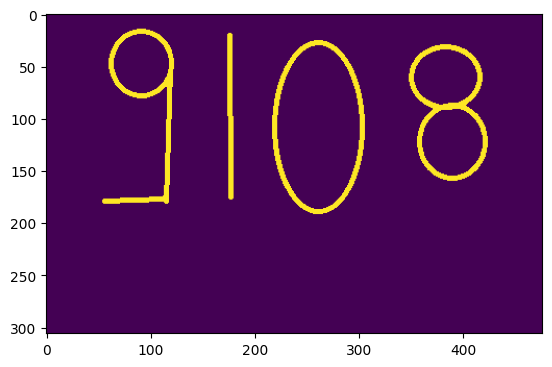

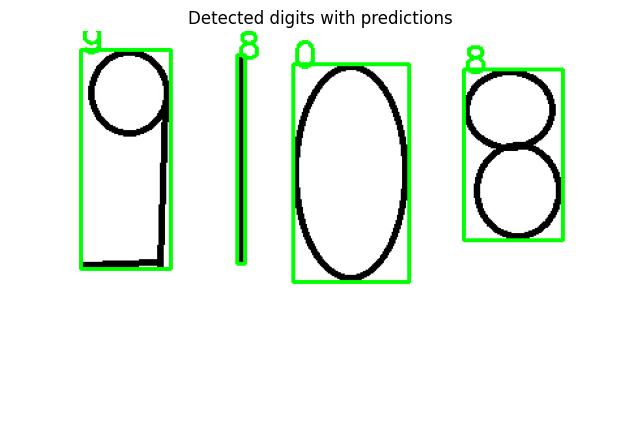

In [ ]:
image_path="image.png"
original,thresholded=preprocess_image(image_path)
result_img=extract_and_predict_digits(original, thresholded)
result_img=cv2.cvtColor(result_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(result_img)
plt.title("Detected digits with predictions")
plt.axis('off')
plt.show()